In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Additional imports for new algorithms
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor

# 1. Data Loading and Exploration
def load_data(file_path):
    data = pd.read_csv(file_path)
    print(data.head())
    print(data.info())
    return data

# 2. Data Preprocessing
def preprocess_data(data):
    # Identify numeric and categorical columns
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# 3. Model Training and Evaluation
def train_and_evaluate_model(X, y, preprocessor, model, is_classification=True):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    if is_classification:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        return accuracy
    else:
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")
        return r2

# 4. Feature Importance Analysis
def analyze_feature_importance(pipeline, feature_names):
    model = pipeline.named_steps['model']
    feature_importance = model.feature_importances_
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    print("Top 10 most important features:")
    for feature, importance in sorted_features[:10]:
        print(f"{feature}: {importance:.4f}")

# Main execution
if __name__ == "__main__":
    # Load the data
    data = load_data(r"C:\Users\ADMIN\Data Analytics Projects\Student Perfomance Prediction Project\student_data.csv")

    # Ensure 'performance_category' has no missing values
    data['performance_category'] = data['performance_category'].fillna(data['performance_category'].mode()[0])

    # Define features and targets
    X = data.drop(["performance", "performance_category"], axis=1)
    y_regression = data["performance"]
    y_classification = data["performance_category"]

    # Create preprocessor
    preprocessor = preprocess_data(X)
    
    # Define models to test
    models_classification = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "LightGBM": LGBMClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "SVM": SVC(),
        "NeuralNetwork": MLPClassifier(random_state=42)
    }

    models_regression = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
        "NeuralNetwork": MLPRegressor(random_state=42)
    }
    
    # Train and evaluate classification models
    print("Classification Models:")
    for name, model in models_classification.items():
        print(f"\n{name}:")
        accuracy = train_and_evaluate_model(X, y_classification, preprocessor, model, is_classification=True)
        print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Train and evaluate regression models
    print("\nRegression Models:")
    for name, model in models_regression.items():
        print(f"\n{name}:")
        r2 = train_and_evaluate_model(X, y_regression, preprocessor, model, is_classification=False)
        print(f"R2 Score for {name}: {r2:.2f}")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Additional imports for new algorithms
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor

# 1. Data Loading and Exploration
def load_data(file_path):
    data = pd.read_csv(file_path)
    print(data.head())
    print(data.info())
    return data

# 2. Data Preprocessing
def preprocess_data(data):
    # Identify numeric and categorical columns
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# 3. Model Training and Evaluation
def train_and_evaluate_model(X, y, preprocessor, model, is_classification=True):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    if is_classification:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        return accuracy
    else:
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")
        return r2

# 4. Feature Importance Analysis
def analyze_feature_importance(pipeline, feature_names):
    model = pipeline.named_steps['model']
    feature_importance = model.feature_importances_
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    print("Top 10 most important features:")
    for feature, importance in sorted_features[:10]:
        print(f"{feature}: {importance:.4f}")

# Main execution
if __name__ == "__main__":
    # Load the data
    data = load_data(r"C:\Users\ADMIN\Data Analytics Projects\Student Perfomance Prediction Project\student_data.csv")

    # Ensure 'performance_category' has no missing values
    data['performance_category'] = data['performance_category'].fillna(data['performance_category'].mode()[0])

    # Encode performance_category to numerical labels
    label_encoder = LabelEncoder()
    data['performance_category_encoded'] = label_encoder.fit_transform(data['performance_category'])

    # Define features and targets
    X = data.drop(["performance", "performance_category", "performance_category_encoded"], axis=1)
    y_regression = data["performance"]
    y_classification = data["performance_category_encoded"]

    # Create preprocessor
    preprocessor = preprocess_data(X)
    
    # Define models to test
    models_classification = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "LightGBM": LGBMClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "SVM": SVC(),
        "NeuralNetwork": MLPClassifier(random_state=42)
    }

    models_regression = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
        "NeuralNetwork": MLPRegressor(random_state=42)
    }
    
    # Train and evaluate classification models
    print("Classification Models:")
    for name, model in models_classification.items():
        print(f"\n{name}:")
        accuracy = train_and_evaluate_model(X, y_classification, preprocessor, model, is_classification=True)
        print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Train and evaluate regression models
    print("\nRegression Models:")
    for name, model in models_regression.items():
        print(f"\n{name}:")
        r2 = train_and_evaluate_model(X, y_regression, preprocessor, model, is_classification=False)
        print(f"R2 Score for {name}: {r2:.2f}")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Additional imports for new algorithms
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor

# 1. Data Loading and Exploration
def load_data(file_path):
    data = pd.read_csv(file_path)
    print(data.head())
    print(data.info())
    return data

# 2. Data Preprocessing
def preprocess_data(data):
    # Identify numeric and categorical columns
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# 3. Model Training and Evaluation
def train_and_evaluate_model(X, y, preprocessor, model, is_classification=True):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    if is_classification:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        return accuracy
    else:
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")
        return r2

# 4. Feature Importance Analysis
def analyze_feature_importance(pipeline, feature_names):
    model = pipeline.named_steps['model']
    feature_importance = model.feature_importances_
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    print("Top 10 most important features:")
    for feature, importance in sorted_features[:10]:
        print(f"{feature}: {importance:.4f}")

# Main execution
if __name__ == "__main__":
    # Load the data
    data = load_data(r"C:\Users\ADMIN\Data Analytics Projects\Student Perfomance Prediction Project\new_student_data.csv")

    # Ensure 'performance_category' has no missing values
    data['performance_category'] = data['performance_category'].fillna(data['performance_category'].mode()[0])

    # Encode performance_category to numerical labels
    label_encoder = LabelEncoder()
    data['performance_category_encoded'] = label_encoder.fit_transform(data['performance_category'])

    # Define features and targets
    X = data.drop(["performance", "performance_category", "performance_category_encoded"], axis=1)
    y_regression = data["performance"]
    y_classification = data["performance_category_encoded"]

    # Create preprocessor
    preprocessor = preprocess_data(X)
    
    # Define models to test
    models_classification = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "LightGBM": LGBMClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "SVM": SVC(),
        "NeuralNetwork": MLPClassifier(random_state=42)
    }

    models_regression = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
        "NeuralNetwork": MLPRegressor(random_state=42)
    }
    
    # Train and evaluate classification models
    print("Classification Models:")
    for name, model in models_classification.items():
        print(f"\n{name}:")
        accuracy = train_and_evaluate_model(X, y_classification, preprocessor, model, is_classification=True)
        print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Train and evaluate regression models
    print("\nRegression Models:")
    for name, model in models_regression.items():
        print(f"\n{name}:")
        r2 = train_and_evaluate_model(X, y_regression, preprocessor, model, is_classification=False)
        print(f"R2 Score for {name}: {r2:.2f}")


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Additional imports for new algorithms
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor

# 1. Data Loading and Exploration
def load_data(file_path):
    data = pd.read_csv(file_path)
    print(data.head())
    print(data.info())
    return data

# 2. Data Preprocessing
def preprocess_data(data):
    # Identify numeric and categorical columns
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# 3. Model Training and Evaluation
def train_and_evaluate_model(X, y, preprocessor, model, is_classification=True):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    if is_classification:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        return accuracy
    else:
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")
        return r2

# 4. Feature Importance Analysis
def analyze_feature_importance(pipeline, feature_names):
    model = pipeline.named_steps['model']
    feature_importance = model.feature_importances_
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    print("Top 10 most important features:")
    for feature, importance in sorted_features[:10]:
        print(f"{feature}: {importance:.4f}")

# Main execution
if __name__ == "__main__":
    # Load the data
    data = load_data(r"C:\Users\ADMIN\Data Analytics Projects\Student Perfomance Prediction Project\updated_student_data.csv")

    # Ensure 'performance_category' has no missing values
    data['performance_category'] = data['performance_category'].fillna(data['performance_category'].mode()[0])

    # Encode performance_category to numerical labels
    label_encoder = LabelEncoder()
    data['performance_category_encoded'] = label_encoder.fit_transform(data['performance_category'])

    # Define features and targets
    X = data.drop(["performance", "performance_category", "performance_category_encoded"], axis=1)
    y_regression = data["performance"]
    y_classification = data["performance_category_encoded"]

    # Create preprocessor
    preprocessor = preprocess_data(X)
    
    # Define models to test
    models_classification = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "LightGBM": LGBMClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "SVM": SVC(),
        "NeuralNetwork": MLPClassifier(random_state=42)
    }

    models_regression = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
        "NeuralNetwork": MLPRegressor(random_state=42)
    }
    
    # Train and evaluate classification models
    print("Classification Models:")
    for name, model in models_classification.items():
        print(f"\n{name}:")
        accuracy = train_and_evaluate_model(X, y_classification, preprocessor, model, is_classification=True)
        print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Train and evaluate regression models
    print("\nRegression Models:")
    for name, model in models_regression.items():
        print(f"\n{name}:")
        r2 = train_and_evaluate_model(X, y_regression, preprocessor, model, is_classification=False)
        print(f"R2 Score for {name}: {r2:.2f}")


   student_id  age  gender previous_education  study_hours  sleep_hours  \
0           1   24  Female        High School     4.954645     8.755279   
1           2   21  Female        High School     6.516456     8.852786   
2           3   28  Female           Bachelor     9.487683     7.731368   
3           4   25    Male          Associate     3.166234     7.071363   
4           5   22  Female        High School     2.093512     8.362647   

   attendance_rate family_income parent_education extracurricular_activities  \
0         0.842679        Medium          Primary                         No   
1         0.822324           Low           Higher                         No   
2         0.748366          High           Higher                        Yes   
3         0.896923           Low        Secondary                         No   
4         0.991345          High        Secondary                         No   

  study_group  stress_level  online_courses internet_access  travel_

C:\Users\ADMIN\anaconda3\envs\new_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.90
Accuracy for NeuralNetwork: 0.90

Regression Models:

RandomForest:
Mean Squared Error: 246.20
R2 Score: 0.86
R2 Score for RandomForest: 0.86

XGBoost:
Mean Squared Error: 242.02
R2 Score: 0.86
R2 Score for XGBoost: 0.86

LightGBM:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1859
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 28
[LightGBM] [Info] Start training from score 56.175201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

C:\Users\ADMIN\anaconda3\envs\new_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


   student_id  age  gender previous_education  study_hours  sleep_hours  \
0           1   24  Female        High School     4.954645     8.755279   
1           2   21  Female        High School     6.516456     8.852786   
2           3   28  Female           Bachelor     9.487683     7.731368   
3           4   25    Male          Associate     3.166234     7.071363   
4           5   22  Female        High School     2.093512     8.362647   

   attendance_rate family_income parent_education extracurricular_activities  \
0         0.842679        Medium          Primary                         No   
1         0.822324           Low           Higher                         No   
2         0.748366          High           Higher                        Yes   
3         0.896923           Low        Secondary                         No   
4         0.991345          High        Secondary                         No   

  study_group  stress_level  online_courses internet_access  travel_

C:\Users\ADMIN\anaconda3\envs\new_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.90
Accuracy for NeuralNetwork: 0.90

Regression Models:

RandomForest:
Mean Squared Error: 246.20
R2 Score: 0.86
R2 Score for RandomForest: 0.86

XGBoost:
Mean Squared Error: 242.02
R2 Score: 0.86
R2 Score for XGBoost: 0.86

LightGBM:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1859
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 28
[LightGBM] [Info] Start training from score 56.175201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

C:\Users\ADMIN\anaconda3\envs\new_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 201.85
R2 Score: 0.89
R2 Score for NeuralNetwork: 0.89


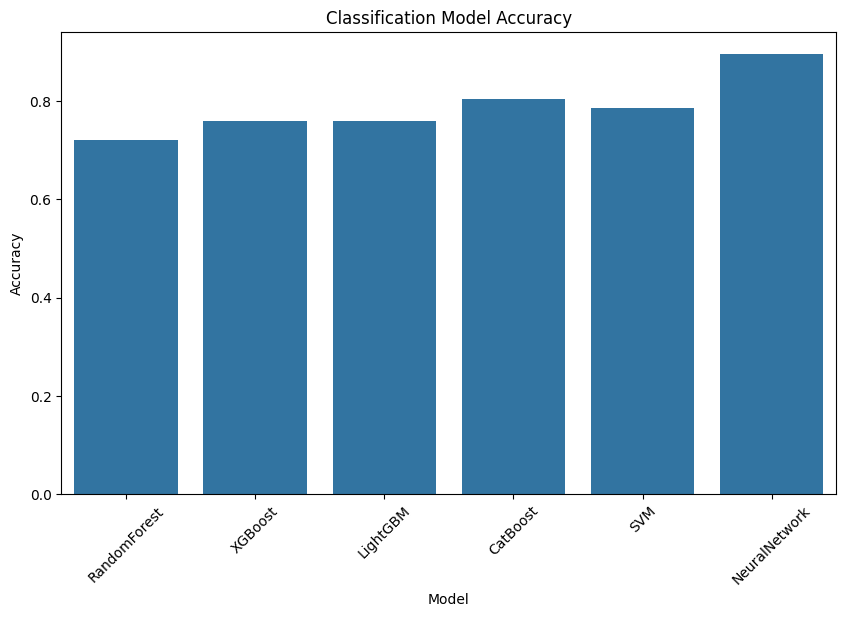

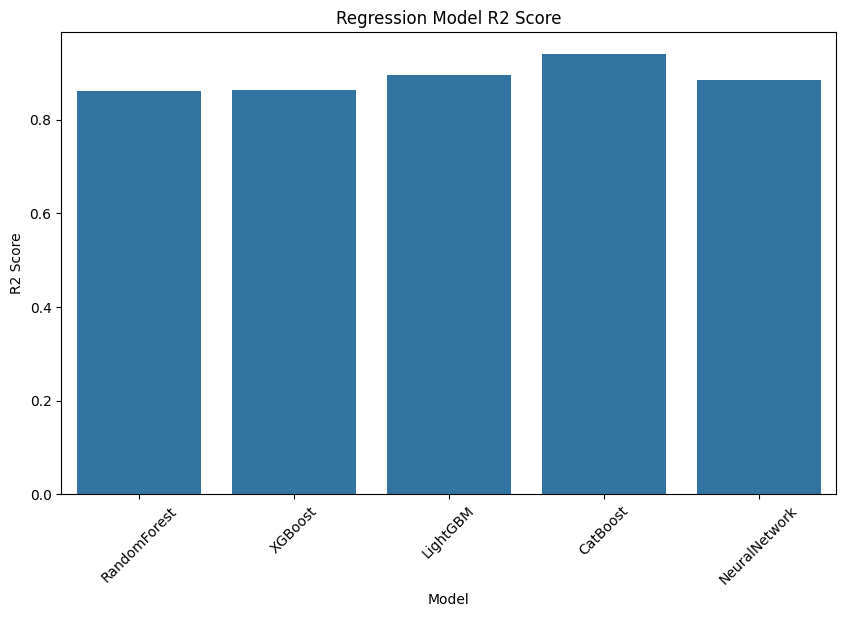

In [5]:
#Visualizing this tings
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize model performance
def visualize_model_performance(results, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the data
    data = load_data(r"C:\Users\ADMIN\Data Analytics Projects\Student Perfomance Prediction Project\updated_student_data.csv")

    # Ensure 'performance_category' has no missing values
    data['performance_category'] = data['performance_category'].fillna(data['performance_category'].mode()[0])

    # Encode performance_category to numerical labels
    label_encoder = LabelEncoder()
    data['performance_category_encoded'] = label_encoder.fit_transform(data['performance_category'])

    # Define features and targets
    X = data.drop(["performance", "performance_category", "performance_category_encoded"], axis=1)
    y_regression = data["performance"]
    y_classification = data["performance_category_encoded"]

    # Create preprocessor
    preprocessor = preprocess_data(X)

    # Define models to test
    models_classification = {
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(random_state=42),
        "LightGBM": LGBMClassifier(random_state=42),
        "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
        "SVM": SVC(),
        "NeuralNetwork": MLPClassifier(random_state=42)
    }

    models_regression = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(random_state=42),
        "LightGBM": LGBMRegressor(random_state=42),
        "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
        "NeuralNetwork": MLPRegressor(random_state=42)
    }

    # Train and evaluate classification models
    classification_results = {}
    print("Classification Models:")
    for name, model in models_classification.items():
        print(f"\n{name}:")
        accuracy = train_and_evaluate_model(X, y_classification, preprocessor, model, is_classification=True)
        classification_results[name] = accuracy
        print(f"Accuracy for {name}: {accuracy:.2f}")

    # Train and evaluate regression models
    regression_results = {}
    print("\nRegression Models:")
    for name, model in models_regression.items():
        print(f"\n{name}:")
        r2 = train_and_evaluate_model(X, y_regression, preprocessor, model, is_classification=False)
        regression_results[name] = r2
        print(f"R2 Score for {name}: {r2:.2f}")

    # Visualize classification model performance
    visualize_model_performance(classification_results, 'Classification Model Accuracy', 'Accuracy')

    # Visualize regression model performance
    visualize_model_performance(regression_results, 'Regression Model R2 Score', 'R2 Score')
